# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Graham Miller

#### [Link to My Repo](https://github.com/gmill88/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [10]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textblob import TextBlob
from spacytextblob.spacytextblob import SpacyTextBlob
import nltk
nltk.download('punkt')


!pip list

print('All prereqs installed.')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/grahammiller/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packaging          24.0
pandas

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

### Question 1 Response

Create pickle file with article

In [71]:
import requests
from bs4 import BeautifulSoup
import pickle

url = "https://www.mlb.com/news/cardinals-2024-season-preview-predictions?partnerID=web_article-share"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
article_content = str(soup.find("article"))

with open('article_content.pkl', 'wb') as file:
    pickle.dump(article_content, file)

Write article to html

In [85]:
import requests

url = "https://www.mlb.com/news/cardinals-2024-season-preview-predictions?partnerID=web_article-share"
response = requests.get(url)

with open('article_content.html', 'w', encoding='utf-8') as file:
    file.write(response.text)

Create cleaned version of the article that only includes the main body of the article

In [86]:
from bs4 import BeautifulSoup

with open('article_content.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

main_content = soup.find('article') or soup.find('section') or soup.find('div', class_='main-body')

if main_content:
    cleaned_soup = BeautifulSoup(str(main_content), 'html.parser')

    with open('cleaned_article.html', 'w', encoding='utf-8') as file:
        file.write(cleaned_soup.prettify())
else:
    print("Main content not found. Try inspecting different elements.")

Print the cleaned version of the article

In [191]:
from bs4 import BeautifulSoup

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

text = soup.get_text()

# Split the text into paragraphs and remove blank paragraphs
paragraphs = [p.strip() for p in text.split('\n\n') if p.strip()]

for paragraph in paragraphs:
    print(paragraph)
    print() 

What's on deck for the Cards in 2024?

March 25th, 2024

John Denton

@
       
       JohnDenton555

Share

share-square-176460

This story was excerpted from John Denton's Cardinals Beat newsletter. To read the full newsletter,

click here
     
     .
     
      And

subscribe

to get it regularly in your inbox.

MESA, Ariz. -- When Cardinals president of baseball operations John Mozeliak stressed late in 2023 that the club would be looking to add three starting pitchers for the upcoming season, fans started dreaming wildly about the scenarios that could potentially materialize.

Was there a baseball world where the Cards would ink National League Cy Young Award winner Blake Snell, bring Jordan Montgomery back to St. Louis and trade for Dylan Cease? What if they lured Aaron Nola out of Philadelphia, finally closed the deal on Sonny Gray and traded for Tyler Glasnow? Lars Nootbaar’s family friend Yoshinobu Yamamoto, with Marcus Stroman and a returning Jack Flaherty, anyone?

Well, a

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

### Question 2 Response

In [141]:
from textblob import TextBlob
from bs4 import BeautifulSoup

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    cleaned_html = file.read()

soup = BeautifulSoup(cleaned_html, 'html.parser')

paragraphs = soup.find_all('p')
article_text = ' '.join([paragraph.get_text() for paragraph in paragraphs])

blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

sentences = blob.sentences
num_sentences = len(sentences)

print(f'Polarity Score: {polarity_score:.2f}')
print(f'Number of Sentences: {num_sentences}')

Polarity Score: 0.14
Number of Sentences: 40


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

### Question 3 Response

In [196]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

visible_text = soup.get_text()
nlp = spacy.load('en_core_web_sm')

doc = nlp(visible_text)

tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

token_counter = Counter(tokens)

common_tokens = token_counter.most_common(5)

print("Common Tokens:")
for token, frequency in common_tokens:
    print(f"{token}: {frequency}")

print("\nAll tokens with frequencies:")
for token, frequency in token_counter.items():
    print(f"{token}: {frequency}")

Common Tokens:
cardinals: 9
cards: 8
season: 7
gray: 7
staff: 7

All tokens with frequencies:
deck: 1
cards: 8
march: 1
john: 3
denton: 2
share: 2
story: 1
excerpted: 1
cardinals: 9
beat: 1
newsletter: 2
read: 1
click: 1
subscribe: 1
regularly: 1
inbox: 1
mesa: 1
president: 1
baseball: 4
operations: 1
mozeliak: 1
stressed: 1
late: 1
club: 2
looking: 2
add: 1
starting: 3
pitchers: 1
upcoming: 1
season: 7
fans: 1
started: 1
dreaming: 1
wildly: 1
scenarios: 1
potentially: 1
materialize: 1
world: 2
ink: 1
national: 1
league: 3
cy: 2
young: 2
award: 1
winner: 1
blake: 1
snell: 1
bring: 2
jordan: 1
montgomery: 1
louis: 3
trade: 2
dylan: 1
cease: 1
lured: 1
aaron: 1
nola: 1
philadelphia: 1
finally: 2
closed: 1
deal: 2
sonny: 2
gray: 7
traded: 1
tyler: 1
glasnow: 1
lars: 1
nootbaar: 1
family: 1
friend: 1
yoshinobu: 1
yamamoto: 1
marcus: 1
stroman: 1
returning: 2
jack: 1
flaherty: 1
snag: 1
player: 1
coveted: 1
years: 3
tried: 1
unsuccessfully: 1
past: 1
took: 1
decidedly: 1
different: 1
path: 

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

### Question 4 Response

In [192]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

visible_text = soup.get_text()

nlp = spacy.load('en_core_web_sm')

doc = nlp(visible_text)

lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

lemma_counter = Counter(lemmas)

common_lemmas = lemma_counter.most_common(5)

print("Common Lemmas:")
for lemma, frequency in common_lemmas:
    print(f"{lemma}: {frequency}")

print("\nAll lemmas with frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")

Common Lemmas:
cards: 8
cardinals: 8
season: 8
gray: 7
staff: 7

All lemmas with frequencies:
deck: 1
cards: 8
march: 1
john: 3
denton: 2
share: 2
story: 1
excerpt: 1
cardinals: 8
beat: 1
newsletter: 2
read: 1
click: 1
subscribe: 1
regularly: 1
inbox: 1
mesa: 1
president: 1
baseball: 4
operation: 1
mozeliak: 1
stress: 1
late: 3
club: 2
look: 3
add: 1
start: 4
pitcher: 1
upcoming: 1
season: 8
fan: 1
dream: 1
wildly: 1
scenario: 1
potentially: 1
materialize: 1
world: 2
ink: 2
national: 1
league: 3
cy: 2
young: 2
award: 1
winner: 1
blake: 1
snell: 1
bring: 2
jordan: 1
montgomery: 1
louis: 3
trade: 4
dylan: 1
cease: 1
lure: 1
aaron: 1
nola: 1
philadelphia: 1
finally: 2
close: 1
deal: 2
sonny: 2
gray: 7
tyler: 1
glasnow: 1
lars: 1
nootbaar: 1
family: 1
friend: 1
yoshinobu: 1
yamamoto: 1
marcus: 1
stroman: 1
return: 2
jack: 1
flaherty: 1
snag: 1
player: 1
covet: 1
year: 5
try: 1
unsuccessfully: 1
past: 1
take: 2
decidedly: 1
different: 1
path: 1
fill: 1
rotation: 1
free: 2
agent: 2
market: 2

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question 5 Response

In [144]:
from bs4 import BeautifulSoup
from textblob import TextBlob

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

visible_text = ''
for paragraph in soup.find_all('p'):  
    visible_text += paragraph.get_text() + ' '

interesting_tokens = ["cardinals", "cards", "season", "gray", "staff"]

def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.split()
    interesting_token_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    score = interesting_token_count / len(tokens) if tokens else 0
    return score

blob = TextBlob(visible_text)
sentences = blob.sentences

for i, sentence in enumerate(sentences, start=1):
    token_score = score_sentence_by_token(str(sentence), interesting_tokens)
    print(f"Sentence {i} Token Score:", token_score)

token_scores = [score_sentence_by_token(str(sentence), interesting_tokens) for sentence in sentences]

Sentence 1 Token Score: 0.08333333333333333
Sentence 2 Token Score: 0.0
Sentence 3 Token Score: 0.0
Sentence 4 Token Score: 0.024390243902439025
Sentence 5 Token Score: 0.03333333333333333
Sentence 6 Token Score: 0.047619047619047616
Sentence 7 Token Score: 0.0
Sentence 8 Token Score: 0.0
Sentence 9 Token Score: 0.05555555555555555
Sentence 10 Token Score: 0.023809523809523808
Sentence 11 Token Score: 0.0
Sentence 12 Token Score: 0.0
Sentence 13 Token Score: 0.09375
Sentence 14 Token Score: 0.07142857142857142
Sentence 15 Token Score: 0.1
Sentence 16 Token Score: 0.0
Sentence 17 Token Score: 0.06451612903225806
Sentence 18 Token Score: 0.04
Sentence 19 Token Score: 0.0
Sentence 20 Token Score: 0.038461538461538464
Sentence 21 Token Score: 0.047619047619047616
Sentence 22 Token Score: 0.0
Sentence 23 Token Score: 0.05
Sentence 24 Token Score: 0.0
Sentence 25 Token Score: 0.043478260869565216
Sentence 26 Token Score: 0.045454545454545456
Sentence 27 Token Score: 0.0
Sentence 28 Token Sco

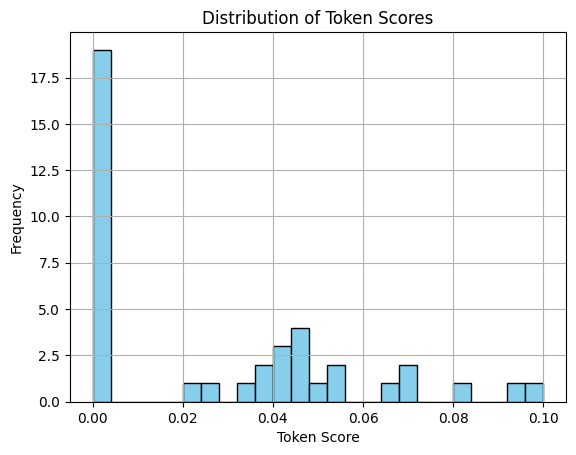

In [145]:
plt.hist(token_scores, bins=25, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Scores')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Observations based on the histogram
- Based on the histogram, the most common token score for sentences in this article is 0-0.02. The most common tokens in the text occured from 7-9 times, while there was 40 sentences in the text. I believe that the common tokens appearing in the same sentences accounts for the fact that the most common token score was so low. 

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question 6 Response

In [146]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import spacy

nlp = spacy.load('en_core_web_sm')

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

paragraphs = soup.find_all('p')  
visible_text = ' '.join(paragraph.get_text() for paragraph in paragraphs)

interesting_lemmas = ["cardinals", "cards", "season", "gray", "staff"]

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_.lower() in interesting_lemmas]
    interesting_lemma_count = len(lemmas)
    score = interesting_lemma_count / len(doc) if doc else 0
    return score

blob = TextBlob(visible_text)
sentences = blob.sentences

for i, sentence in enumerate(sentences, start=1):
    lemma_score = score_sentence_by_lemma(str(sentence), interesting_lemmas)
    print(f"Sentence {i} Lemma Score:", lemma_score)

lemma_scores = [score_sentence_by_lemma(str(sentence), interesting_lemmas) for sentence in sentences]


Sentence 1 Lemma Score: 0.0625
Sentence 2 Lemma Score: 0.0
Sentence 3 Lemma Score: 0.0
Sentence 4 Lemma Score: 0.045454545454545456
Sentence 5 Lemma Score: 0.03125
Sentence 6 Lemma Score: 0.043478260869565216
Sentence 7 Lemma Score: 0.0
Sentence 8 Lemma Score: 0.0
Sentence 9 Lemma Score: 0.05128205128205128
Sentence 10 Lemma Score: 0.017857142857142856
Sentence 11 Lemma Score: 0.0
Sentence 12 Lemma Score: 0.043478260869565216
Sentence 13 Lemma Score: 0.08108108108108109
Sentence 14 Lemma Score: 0.058823529411764705
Sentence 15 Lemma Score: 0.08695652173913043
Sentence 16 Lemma Score: 0.0
Sentence 17 Lemma Score: 0.11428571428571428
Sentence 18 Lemma Score: 0.037037037037037035
Sentence 19 Lemma Score: 0.0
Sentence 20 Lemma Score: 0.03333333333333333
Sentence 21 Lemma Score: 0.034482758620689655
Sentence 22 Lemma Score: 0.0
Sentence 23 Lemma Score: 0.12
Sentence 24 Lemma Score: 0.0
Sentence 25 Lemma Score: 0.08
Sentence 26 Lemma Score: 0.029411764705882353
Sentence 27 Lemma Score: 0.0
S

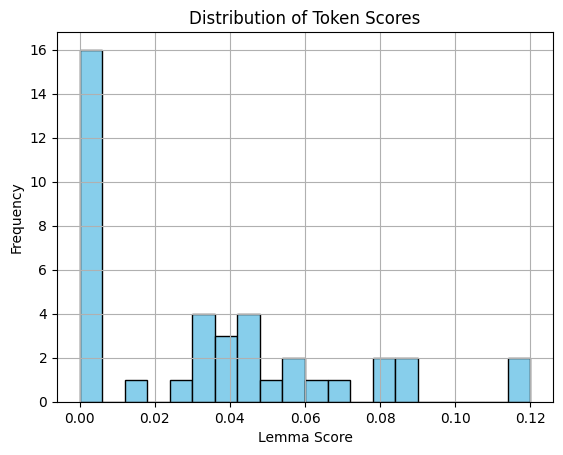

In [197]:
plt.hist(lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Scores')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Histogram Observations
- Again, the most common score from the article was 0-0.03. I still think this is due to the fact that the most common lemmas did not occur in the text at a high proportion compared to the number of sentences. This could also be due to common lemmas occuring in the same sentences as one another. I also noticed that there weren't really any sentences with high lemma scores, and I believe this is due to the author writing very long sentences throughout the text and diluting the scores of each sentence. 

### Question 7 Response

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.05
* Cutoff Score (lemmas): 0.04

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [148]:
from bs4 import BeautifulSoup
from textblob import TextBlob

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')
# exclude headings and subheadings
visible_text = ''
for element in soup.find_all(['p', 'span']):  
    visible_text += element.get_text() + ' '

nlp = spacy.load('en_core_web_sm')

interesting_tokens = ["cardinals", "cards", "season", "gray", "staff"]

cutoff_score = 0.05

summary_sentences = []

def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.split()
    interesting_token_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    score = interesting_token_count / len(tokens) if tokens else 0
    return score

blob = TextBlob(visible_text)
sentences = blob.sentences

for sentence in sentences:
    token_score = score_sentence_by_token(str(sentence), interesting_tokens)
    if token_score > cutoff_score:
        summary_sentences.append(str(sentence))


formatted_sentences = [sentence.strip() for sentence in summary_sentences]

formatted_summary = " ".join(formatted_sentences)

formatted_summary = " ".join(formatted_summary.split())

print("Summary:")
print(formatted_summary)

Summary:
John Denton This story was excerpted from John Denton's Cardinals Beat newsletter. The Cardinals did finally snag Gray -- a player they coveted for years and had tried unsuccessfully to deal for in the past -- but they took a decidedly different path in filling out the rotation. The question now, of course, is this: Did the Cardinals do enough to patch a pitching staff that left its fingerprints all over the franchise’s worst season in 33 years in 2023? Gray is already injured , and Lynn and Gibson have looked shaky this spring. If Lynn and Gibson can’t stabilize the staff and stay healthy, can the Cards avoid a similar fate in 2024? The starting staff must get -- and stay -- healthy With a very difficult start to the season, the Cardinals' revamped pitching staff will be put to the test right away. Sonny Gray Despite Gray’s right hamstring injury, he impressed the club with his strong communication skills and his gameplanning. Bold prediction Cards will win the NL Central Sim

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

### Question 9 Response

In [122]:
from textblob import TextBlob

summary_blob = TextBlob(formatted_summary)

summary_polarity_score = summary_blob.sentiment.polarity

num_summary_sentences = len(formatted_sentences)

print("Polarity Score of the Summary:", summary_polarity_score)
print("Number of Sentences in the Summarized Article:", num_summary_sentences)

Polarity Score of the Summary: 0.08942099567099566
Number of Sentences in the Summarized Article: 8


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

### Question 10 Response

In [198]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import spacy

with open('cleaned_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

visible_text = ''
for element in soup.find_all(['p', 'span']):  
    visible_text += element.get_text() + ' '

nlp = spacy.load('en_core_web_sm')

interesting_lemmas = ["cardinal", "card", "season", "gray", "staff"]

cutoff_score = 0.04

summary_sentences = []

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_.lower() in interesting_lemmas]
    interesting_lemma_count = len(lemmas)
    score = interesting_lemma_count / len(doc) if doc else 0
    return score

blob = TextBlob(visible_text)
sentences = blob.sentences

for sentence in sentences:
    lemma_score = score_sentence_by_lemma(str(sentence), interesting_lemmas)
    if lemma_score > cutoff_score:
        summary_sentences.append(str(sentence))

formatted_sentences = [sentence.strip() for sentence in summary_sentences]


formatted_summary = " ".join(formatted_sentences)

formatted_summary = " ".join(formatted_summary.split())

print("Summary:")
print(formatted_summary)

Summary:
What if they lured Aaron Nola out of Philadelphia, finally closed the deal on Sonny Gray and traded for Tyler Glasnow? Both wanted to be Cardinals, and the franchise fulfilled those desires even though both had rocky ERAs from the previous season. The question now, of course, is this: Did the Cardinals do enough to patch a pitching staff that left its fingerprints all over the franchise’s worst season in 33 years in 2023? Gray is already injured , and Lynn and Gibson have looked shaky this spring. If Lynn and Gibson can’t stabilize the staff and stay healthy, can the Cards avoid a similar fate in 2024? The starting staff must get -- and stay -- healthy With a very difficult start to the season, the Cardinals' revamped pitching staff will be put to the test right away. However, they won’t be able to support the staff without healthy and productive seasons from Gray, Lynn, Gibson and Matz. Gorman was limited to 119 games last season because of back trouble, and he still led the 

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

### Question 11 Response

In [199]:
from textblob import TextBlob

summary_blob = TextBlob(formatted_summary)

summary_polarity_score = summary_blob.sentiment.polarity

num_summary_sentences = len(formatted_sentences)

print("Polarity Score of the Summary:", summary_polarity_score)
print("Number of Sentences in the Summarized Article:", num_summary_sentences)

Polarity Score of the Summary: 0.07063492063492063
Number of Sentences in the Summarized Article: 10


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

| Summary                  | Polarity Score         | Subjectivity Score |
|--------------------------|------------------------|--------------------|
| Full Article     | 0.14; Sentences: 40    | This polarity score indicates that the article had a slightly positive sentiment. Having read through the article, I agree with this sentiment score. The article discussed the things that went wrong last season, but focused more on the promising signs for this season making it slightly more positive.                |
| Token Score Summary      | 0.0894; Sentences: 8   | The polarity score for the token score summary indicates that the summary created was slightly less positive than the original article. After reading through both, I tend to agree with the score assigned to the token score summary. It seems that the sentences containing the most common tokens seemed to include several sentences with a more negative outlook, but there was also as many sentences that I would consider positive. Therefore, an almost neutral score of .0894 is to be expected.                |
| Lemma Score Summary      | 0.0706; Sentences: 10  | The polarity score for the lemma score summary is also slightly less positive than the original article. Like the token score summary, the sentences contained in the generated summary seem to be about half positive and half negative. Because of this, I agree with the score being less positive than the original article               |

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

#### Conclusion
I liked the token score summary better than the lemma score summary. The token score summary is easier to read, and I think it better captures the story that the original article was trying to tell. The token score summary that was generated also had a closer polarity score to the original article, so I think that also points to the fact that it better captured the sentiment of the article. 